In [24]:
# Importing Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
NSE = yf.Ticker('^NSEI')

NSE = NSE.history(period = "max")
NSE

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-27 00:00:00+05:30,24204.800781,24354.550781,24145.650391,24274.900391,295000,0.0,0.0
2024-11-28 00:00:00+05:30,24274.150391,24345.750000,23873.349609,23914.150391,366700,0.0,0.0
2024-11-29 00:00:00+05:30,23927.150391,24188.449219,23927.150391,24131.099609,282100,0.0,0.0


In [26]:
NSE.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2024-11-19 00:00:00+05:30', '2024-11-21 00:00:00+05:30',
               '2024-11-22 00:00:00+05:30', '2024-11-25 00:00:00+05:30',
               '2024-11-26 00:00:00+05:30', '2024-11-27 00:00:00+05:30',
               '2024-11-28 00:00:00+05:30', '2024-11-29 00:00:00+05:30',
               '2024-12-02 00:00:00+05:30', '2024-12-03 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=4219, freq=None)

<Axes: xlabel='Date'>

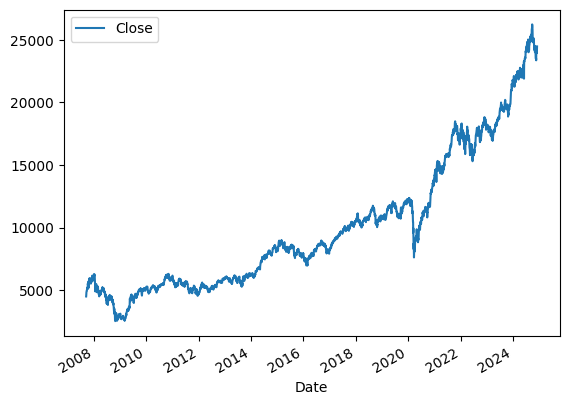

In [27]:
NSE.plot.line(y="Close", use_index = True)

In [28]:
del NSE["Dividends"]
del NSE["Stock Splits"]

NSE["Tomorrow"] = NSE["Close"].shift(-1)
NSE

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195
...,...,...,...,...,...,...
2024-11-27 00:00:00+05:30,24204.800781,24354.550781,24145.650391,24274.900391,295000,23914.150391
2024-11-28 00:00:00+05:30,24274.150391,24345.750000,23873.349609,23914.150391,366700,24131.099609
2024-11-29 00:00:00+05:30,23927.150391,24188.449219,23927.150391,24131.099609,282100,24276.050781


In [29]:
NSE["Target"] = (NSE["Tomorrow"] > NSE['Close']).astype(int)
NSE

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2024-11-27 00:00:00+05:30,24204.800781,24354.550781,24145.650391,24274.900391,295000,23914.150391,0
2024-11-28 00:00:00+05:30,24274.150391,24345.750000,23873.349609,23914.150391,366700,24131.099609,1
2024-11-29 00:00:00+05:30,23927.150391,24188.449219,23927.150391,24131.099609,282100,24276.050781,1


In [30]:
# define ticker and fetch records
# stock = input("enter a Ticker\n")
# start_date = input("Enter start date to fetch records in yyyy-mm-dd format")
# end_date = input("Enter end date to fetch records in yyyy-mm-dd format")

stock = "NVDA"
start_date = "2020-01-01"
end_date = "2024-12-31"

data = yf.download(stock, start = start_date , end = end_date)
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2020-01-02,5.973123,5.997750,5.997750,5.918000,5.968750,237536000
2020-01-03,5.877515,5.901750,5.945750,5.852500,5.877500,205384000
2020-01-06,5.902164,5.926500,5.931750,5.781750,5.808000,262636000
2020-01-07,5.973621,5.998250,6.044250,5.909750,5.955000,314856000
2020-01-08,5.984825,6.009500,6.051000,5.953750,5.994000,277108000
...,...,...,...,...,...,...
2024-11-26,136.919998,136.919998,139.300003,135.669998,137.699997,190287700
2024-11-27,135.339996,135.339996,137.220001,131.800003,135.009995,226370900


In [31]:
df = pd.DataFrame(data)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2020-01-02,5.973123,5.99775,5.99775,5.91800,5.96875,237536000
2020-01-03,5.877515,5.90175,5.94575,5.85250,5.87750,205384000
2020-01-06,5.902164,5.92650,5.93175,5.78175,5.80800,262636000
2020-01-07,5.973621,5.99825,6.04425,5.90975,5.95500,314856000
2020-01-08,5.984825,6.00950,6.05100,5.95375,5.99400,277108000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2020-01-02 to 2024-12-03
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  1239 non-null   float64
 1   (Close, NVDA)      1239 non-null   float64
 2   (High, NVDA)       1239 non-null   float64
 3   (Low, NVDA)        1239 non-null   float64
 4   (Open, NVDA)       1239 non-null   float64
 5   (Volume, NVDA)     1239 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.8 KB


In [33]:
#Making date as a feature
df['date'] = pd.to_datetime(df.index)
df

Price,Adj Close,Close,High,Low,Open,Volume,date
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
2020-01-02,5.973123,5.997750,5.997750,5.918000,5.968750,237536000,2020-01-02
2020-01-03,5.877515,5.901750,5.945750,5.852500,5.877500,205384000,2020-01-03
2020-01-06,5.902164,5.926500,5.931750,5.781750,5.808000,262636000,2020-01-06
2020-01-07,5.973621,5.998250,6.044250,5.909750,5.955000,314856000,2020-01-07
2020-01-08,5.984825,6.009500,6.051000,5.953750,5.994000,277108000,2020-01-08
...,...,...,...,...,...,...,...
2024-11-26,136.919998,136.919998,139.300003,135.669998,137.699997,190287700,2024-11-26
2024-11-27,135.339996,135.339996,137.220001,131.800003,135.009995,226370900,2024-11-27


In [35]:
# Dropping date and volume to make it less complex
df.drop(['date', 'Volume'], axis = 1 , inplace = True)
df.reset_index(drop=True, inplace = True)
df

Price,Adj Close,Close,High,Low,Open
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
0,5.973123,5.997750,5.997750,5.918000,5.968750
1,5.877515,5.901750,5.945750,5.852500,5.877500
2,5.902164,5.926500,5.931750,5.781750,5.808000
3,5.973621,5.998250,6.044250,5.909750,5.955000
4,5.984825,6.009500,6.051000,5.953750,5.994000
...,...,...,...,...,...
1234,136.919998,136.919998,139.300003,135.669998,137.699997
1235,135.339996,135.339996,137.220001,131.800003,135.009995
1236,138.250000,138.250000,139.350006,136.050003,136.779999


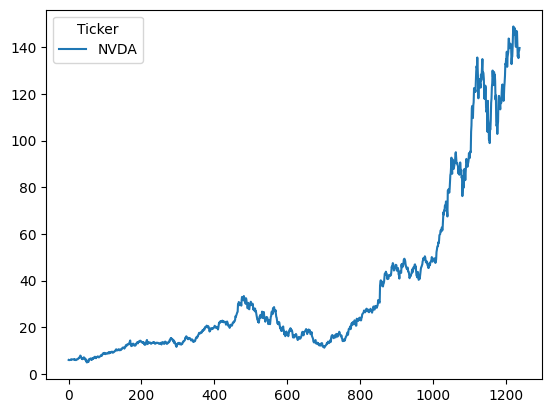

In [36]:
df.plot.line(y="Close", use_index = True)
df.reset_index(drop=True, inplace = True)

In [37]:
# Features
X = df[['Open','Close', 'High', 'Low', 'Adj Close']]
# Target Values
y = df[['Close', 'Adj Close']]

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
rf.fit(X_train.values, y_train.values)

# Predictions
y_pred = rf.predict(X_test.values)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

R-squared (R²) Score: 0.9999397653589397


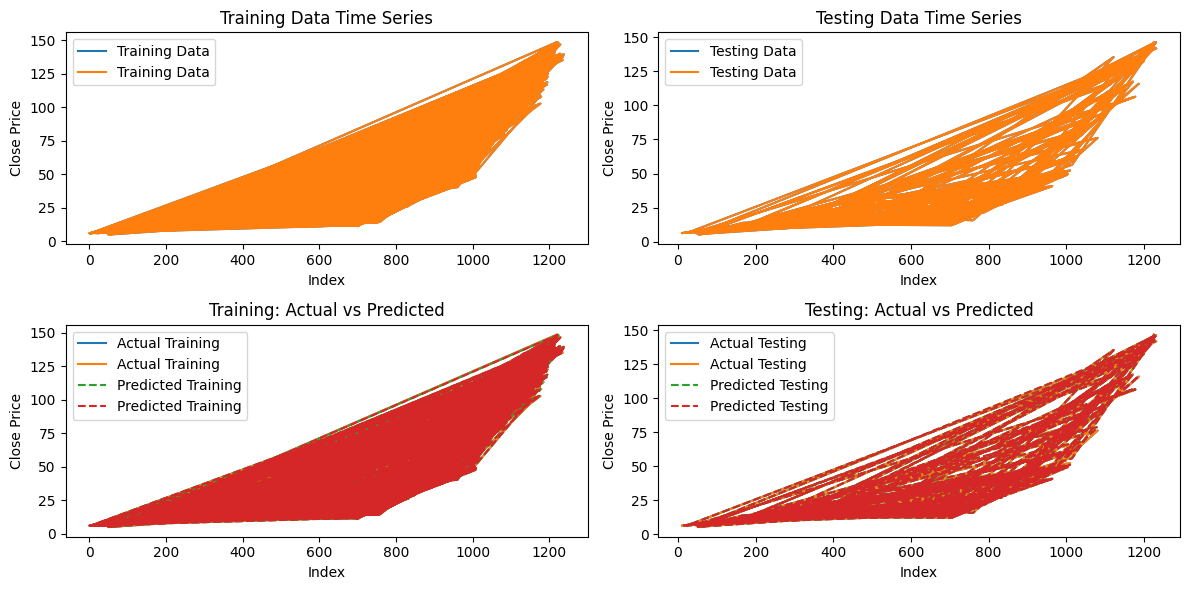

In [38]:
# Plotting time series for training and testing data
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(y_train.index, y_train.values, label='Training Data')
plt.title('Training Data Time Series')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(y_test.index, y_test.values, label='Testing Data')
plt.title('Testing Data Time Series')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()

# Plotting predictions
plt.subplot(2, 2, 3)
plt.plot(y_train.index, y_train.values, label='Actual Training')
plt.plot(y_train.index, rf.predict(X_train.values), label='Predicted Training', linestyle='--')
plt.title('Training: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(y_test.index, y_test.values, label='Actual Testing')
plt.plot(y_test.index, y_pred, label='Predicted Testing', linestyle='--')
plt.title('Testing: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

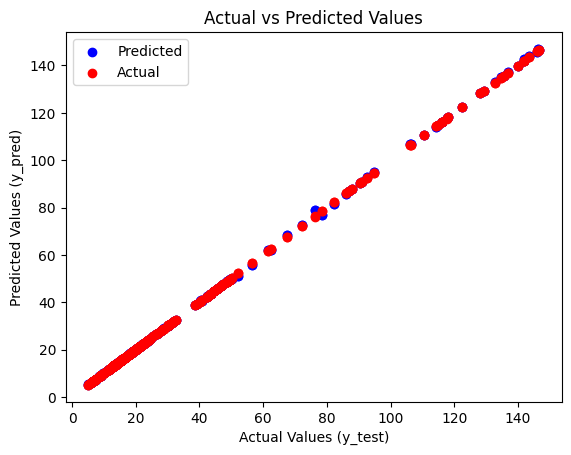

In [39]:
# Scatter plot of y_pred and y_test
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Scatter plot for y_pred with blue color
plt.scatter(y_test, y_test, color='red', label='Actual')  # Scatter plot for y_test with red color
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()  # Add legend to differentiate the scatter plots
plt.show()

In [40]:
# Create the forecast analysis plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=y, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=X, y=rf.predict(X), mode='lines', name='Forecast'))
fig.add_trace(go.Scatter(x=X, y=y - rf.predict(X), mode='lines', name='Forecast Uncertainty'))

fig.update_layout(
    title='FB_Model_Forecast_Analysis',
    xaxis_title='Date',
    yaxis_title='Price of Stock',
    legend_title='Legend'
)

fig.show()

In [41]:
df.tail()

Price,Adj Close,Close,High,Low,Open
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
1234,136.919998,136.919998,139.300003,135.669998,137.699997
1235,135.339996,135.339996,137.220001,131.800003,135.009995
1236,138.250000,138.250000,139.350006,136.050003,136.779999
1237,138.630005,138.630005,140.449997,137.820007,138.830002
1238,139.654800,139.654800,140.539993,137.949997,138.315002


In [42]:
#Inputting Value of features
initial_array = np.array([['x', 'y', 'z', 'a', 'b']])
updated_array = np.concatenate((initial_array[:-1], df.tail(1).values))
print(updated_array)

#Predicting
predicted_price = rf.predict(updated_array)

print(predicted_price[0])

[['139.65480041503906' '139.65480041503906' '140.5399932861328'
  '137.9499969482422' '138.31500244140625']]
[139.16530029 139.16530029]
